In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
new_data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]].copy()

In [5]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1


In [13]:
new_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

# Encoding

In [7]:
#Fill missing values smartly:
    #Age: Use median or predictive model (optional).
    #Embarked: Fill with mode.
    #Fare: Fill missing with median.

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
si = SimpleImputer(strategy = "median")
new_data[["Age","Fare"]] = si.fit_transform(new_data[["Age","Fare"]])

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
new_data["Sex"] = le.fit_transform(new_data["Sex"])

In [12]:
le1 = LabelEncoder()
new_data["Embarked"] = le.fit_transform(new_data["Embarked"])

# Scaling by MinmaxScaler

In [14]:
#Feature scaling (new step):
#Use StandardScaler or MinMaxScaler on Age, Fare.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
ms = MinMaxScaler()
ms.fit(new_data[["Age","Fare"]])

MinMaxScaler()

In [17]:
new_data[["Age","Fare"]] = ms.transform(new_data[["Age","Fare"]])

# Models

In [18]:
#Train and compare the following models:
    #Logistic Regression
    #Decision Tree
    #Random Forest
    #K-Nearest Neighbors (KNN)

In [19]:
x = new_data.iloc[:,:-1]
y=new_data["Survived"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100

(80.47752808988764, 79.88826815642457)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(97.89325842696628, 77.09497206703911)

In [27]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [28]:
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(95.50561797752809, 81.56424581005587)

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
knn.score(x_train,y_train)*100 , knn.score(x_test,y_test)*100

(84.8314606741573, 80.44692737430168)

# Confusion matrix,precision score,recall score,f1 score,cross validation

In [31]:
#For each model:
    #Show confusion matrix
    #Show classification report (precision, recall, F1-score)
    #Use cross_val_score() for average accuracy

In [32]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

In [33]:
cf = confusion_matrix(y_test,lr.predict(x_test))
cf

array([[89, 16],
       [20, 54]])

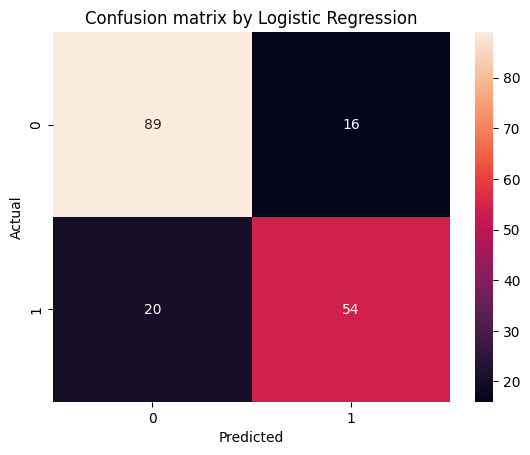

In [34]:
sns.heatmap(cf,annot=True)
plt.title("Confusion matrix by Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
ps = precision_score(y_test,lr.predict(x_test))*100
ps

77.14285714285715

In [36]:
rs = recall_score(y_test,lr.predict(x_test))*100
rs

72.97297297297297

In [37]:
f1s = f1_score(y_test,lr.predict(x_test))*100
f1s

75.0

In [38]:
cvs = cross_val_score(LogisticRegression(),x,y,cv=5)
cvs*100

array([79.32960894, 78.08988764, 78.08988764, 76.96629213, 82.58426966])

In [39]:
cf1 = confusion_matrix(y_test,dt.predict(x_test))
cf1

array([[82, 23],
       [18, 56]])

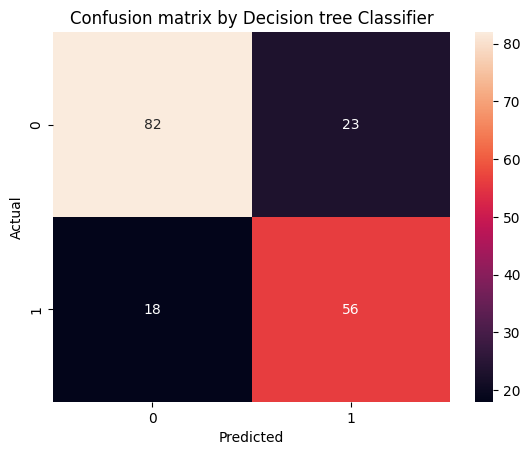

In [40]:
sns.heatmap(cf1,annot=True)
plt.title("Confusion matrix by Decision tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
psd = precision_score(y_test,dt.predict(x_test))*100
psd

70.88607594936708

In [42]:
rsd = recall_score(y_test,dt.predict(x_test))*100
rsd

75.67567567567568

In [43]:
f1sd = f1_score(y_test,dt.predict(x_test))*100
f1sd

73.20261437908496

In [44]:
cvsd = cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
cvsd*100

array([77.65363128, 79.7752809 , 80.33707865, 73.03370787, 81.46067416])

In [45]:
cf2 = confusion_matrix(y_test,rf.predict(x_test))
cf2

array([[88, 17],
       [16, 58]])

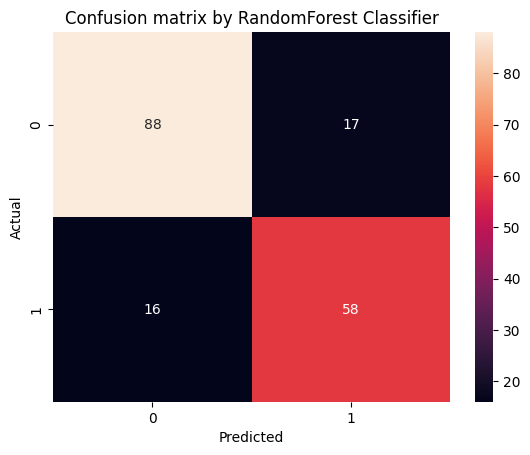

In [46]:
sns.heatmap(cf2,annot=True)
plt.title("Confusion matrix by RandomForest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
psr = precision_score(y_test,rf.predict(x_test))*100
psr

77.33333333333333

In [48]:
rsr = recall_score(y_test,rf.predict(x_test))*100
rsr

78.37837837837837

In [49]:
f1sr = f1_score(y_test,rf.predict(x_test))*100
f1sr

77.85234899328859

In [50]:
cvsr = cross_val_score(RandomForestClassifier(),x,y,cv=5)
cvsr*100

array([78.77094972, 80.8988764 , 84.83146067, 76.40449438, 82.58426966])

In [51]:
cf3 = confusion_matrix(y_test,knn.predict(x_test))
cf3

array([[90, 15],
       [20, 54]])

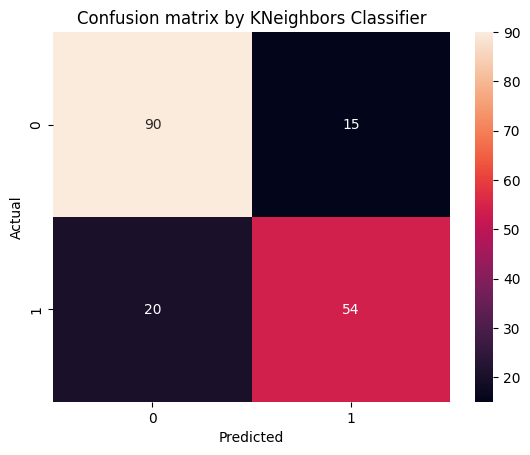

In [52]:
sns.heatmap(cf3,annot=True)
plt.title("Confusion matrix by KNeighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
psk = precision_score(y_test,knn.predict(x_test))*100
psk

78.26086956521739

In [54]:
rsk = recall_score(y_test,knn.predict(x_test))*100
rsk

72.97297297297297

In [55]:
f1sk = f1_score(y_test,knn.predict(x_test))*100
f1sk

75.52447552447552

In [56]:
cvsk = cross_val_score(KNeighborsClassifier(),x,y,cv=5)
cvsk*100

array([73.74301676, 76.40449438, 83.14606742, 79.7752809 , 79.7752809 ])

# Feature selection by Random Forest

In [ ]:
#eature importance in RandomForest

In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [58]:
fs =SequentialFeatureSelector(rf,k_features = 5 , forward = True)
fs.fit(x_train,y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=5),
                          k_features=(5, 5), scoring='accuracy')

In [59]:
fs.feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [60]:
fs.k_feature_names_

('Pclass', 'Sex', 'Age', 'SibSp', 'Embarked')

In [61]:
fs.k_score_

np.float64(0.7977740569289865)